In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
np.random.seed(10)

# Exercice 1

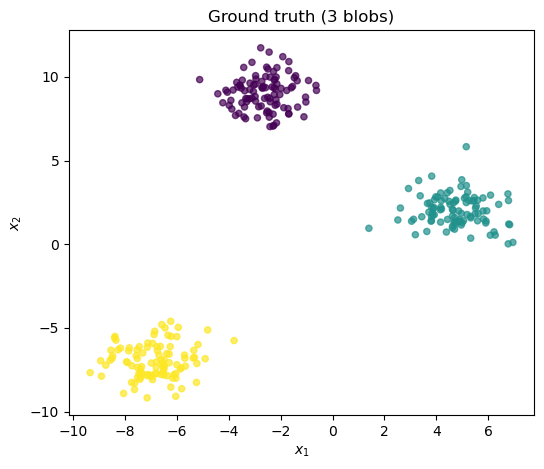

In [2]:
X_blobs, y_blobs = make_blobs(n_samples=300, centers=3, 
                               cluster_std=1.0, random_state=42)

plt.figure(figsize=(6, 5))
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs, cmap='viridis', 
            s=20, alpha=0.7)
plt.title("Ground truth (3 blobs)")
plt.xlabel("$x_1$"); plt.ylabel("$x_2$")
plt.show()


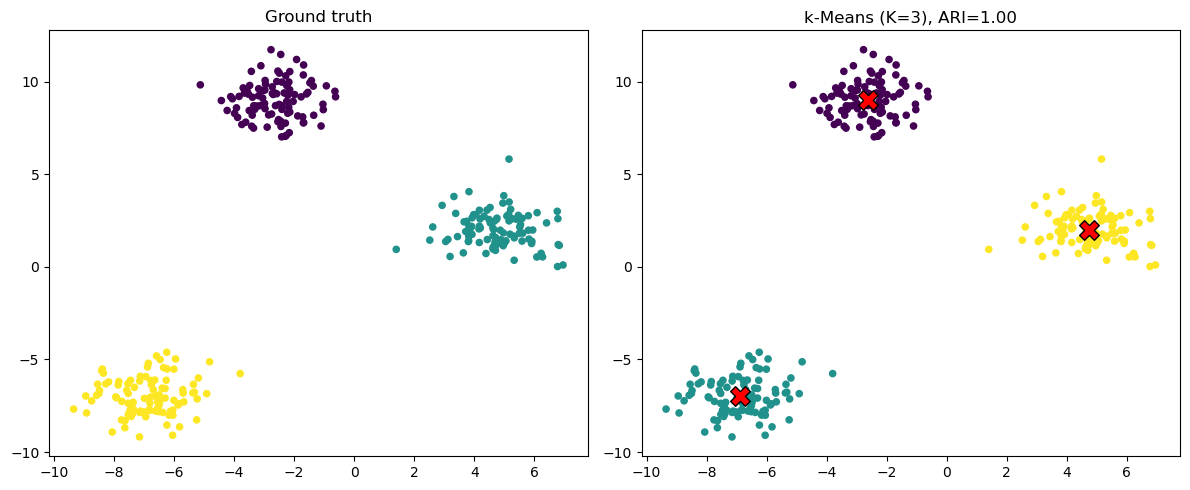

In [3]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, 
                random_state=42)
labels_km = kmeans.fit_predict(X_blobs)

# Visualise
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs, 
                cmap='viridis', s=20)
axes[0].set_title("Ground truth")

axes[1].scatter(X_blobs[:, 0], X_blobs[:, 1], c=labels_km, 
                cmap='viridis', s=20)
axes[1].scatter(kmeans.cluster_centers_[:, 0], 
                kmeans.cluster_centers_[:, 1],
                c='red', marker='X', s=200, edgecolors='black')
axes[1].set_title(f"k-Means (K=3), ARI={adjusted_rand_score(y_blobs, labels_km):.2f}")
plt.tight_layout(); plt.show()


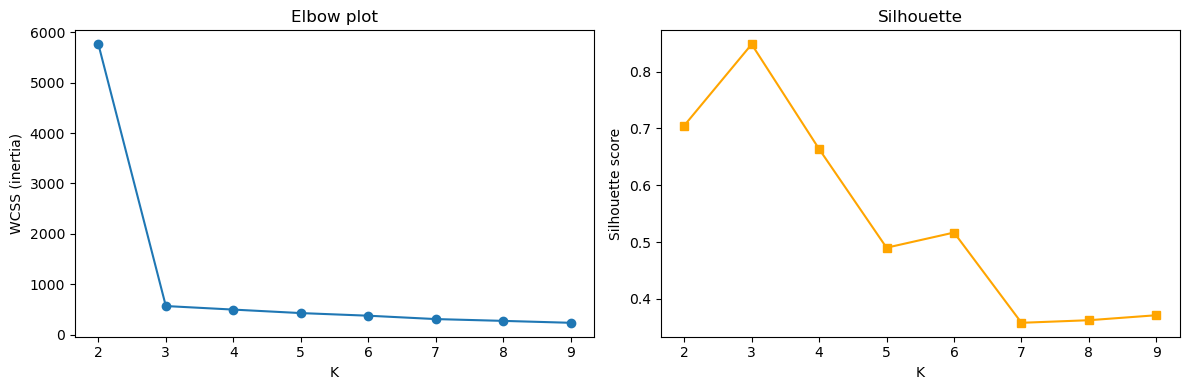

In [5]:
Ks = range(2, 10)
inertias = []
silhouettes = []

for K in Ks:
    km = KMeans(n_clusters=K, n_init=10, random_state=42)
    km.fit(X_blobs)
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(X_blobs, km.labels_))

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].plot(Ks, inertias, 'o-'); axes[0].set_xlabel("K")
axes[0].set_ylabel("WCSS (inertia)"); axes[0].set_title("Elbow plot")

axes[1].plot(Ks, silhouettes, 's-', color='orange'); axes[1].set_xlabel("K")
axes[1].set_ylabel("Silhouette score"); axes[1].set_title("Silhouette")
plt.tight_layout(); plt.show()


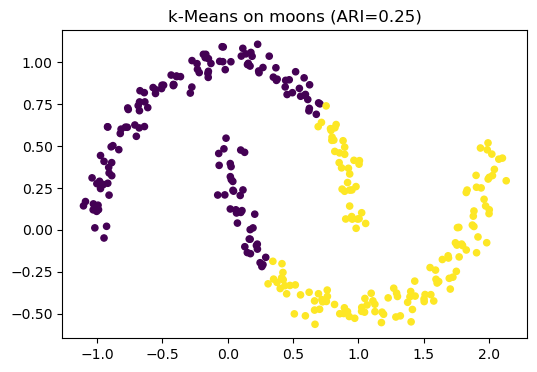

In [6]:
X_moons, y_moons = make_moons(n_samples=300, noise=0.05, 
                               random_state=42)

km_moons = KMeans(n_clusters=2, random_state=42).fit(X_moons)

plt.figure(figsize=(6, 4))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=km_moons.labels_, 
            cmap='viridis', s=20)
plt.title(f"k-Means on moons (ARI={adjusted_rand_score(y_moons, km_moons.labels_):.2f})")
plt.show()
